In [1]:
import os
import scanpy as sc

In [2]:
pth = os.path.join('..', 'data')
pth_data = os.path.join(pth, 'aliia')
pth_out = os.path.join(pth, 'scenic')

In [3]:
fn = 'epcam_clusters_annotation.h5ad'
adata = sc.read_h5ad(os.path.join(pth_data, fn))
adata

AnnData object with n_obs × n_vars = 42129 × 25865
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'leiden_refined', 'cluster_annotations'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cluster_annotations', 'cluster_annotations_colors', 'day_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_refined_colors', 'location_colors', 'log1p', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

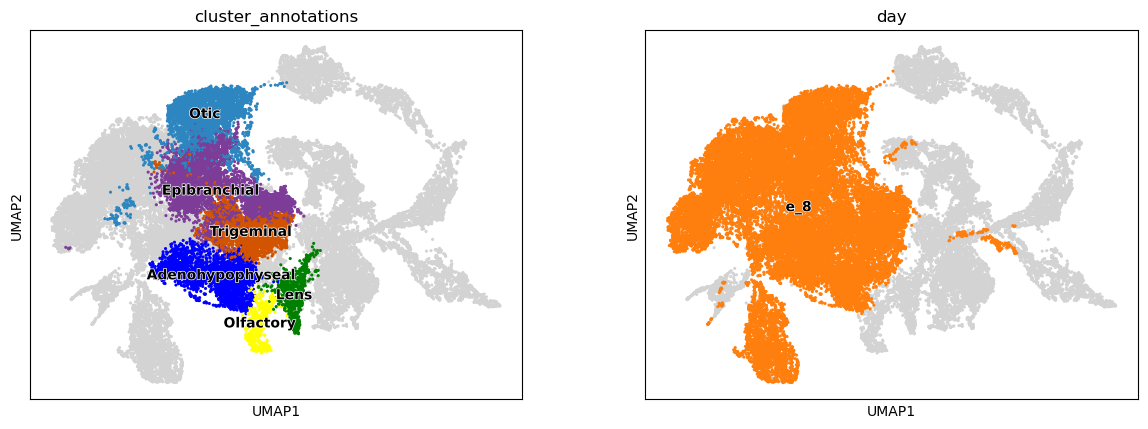

In [4]:
placodes = ['Adenohypophyseal',
            'Epibranchial',
            'Lens', 'Olfactory',
            'Otic', 'Trigeminal']

sc.pl.umap(adata, size = 20,
           color = ['cluster_annotations', 'day'],
           groups = placodes + ['e_8'],
           legend_loc = 'on data',
           legend_fontoutline = 1,
           na_in_legend = False)

In [5]:
# select placodes, filter genes (>1% cells)
clus = adata.obs.cluster_annotations
msk_obs = clus.isin(placodes)
msk_hvg = adata.var.highly_variable
adata = adata[msk_obs, msk_hvg].copy()
min_cells = int(adata.n_obs * .01)
sc.pp.filter_genes(adata, min_cells = min_cells)
adata

AnnData object with n_obs × n_vars = 15136 × 2023
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'leiden_refined', 'cluster_annotations'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells'
    uns: 'cluster_annotations', 'cluster_annotations_colors', 'day_colors', 'hvg', 'leiden', 'location_colors', 'log1p', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [6]:
# assign genes -> clusters (mean expression)
adata_clus = sc.get.aggregate(adata = adata,
                              by = 'cluster_annotations',
                              func = 'mean')
cat = adata_clus.obs.cluster_annotations.values
ix = adata_clus.layers['mean'].argmax(axis = 0)
adata.var['cluster_annotations'] = cat[ix]

In [ ]:
e8_placodes = placodes.copy()
for name in ('Olfactory', 'Lens'):
    e8_placodes.remove(name)

# select E8 placodes, genes (only)
clus_obs = adata.obs.cluster_annotations
msk_obs = clus_obs.isin(e8_placodes)
clus_var = adata.var.cluster_annotations
msk_var = clus_var.isin(e8_placodes)
adata = adata[msk_obs, msk_var].copy()
adata

AnnData object with n_obs × n_vars = 13690 × 1012
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'leiden_refined', 'cluster_annotations'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells', 'cluster_annotations'
    uns: 'cluster_annotations', 'day_colors', 'hvg', 'leiden', 'location_colors', 'log1p', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [8]:
# save outputs
fn = 'e8_placodes'
adata.write_loom(os.path.join(pth_out, f'{fn}.loom'))
adata.write_h5ad(os.path.join(pth_data, f'{fn}.h5ad'))

The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations
